## Chapter9 - Working with Structured Data:

In [142]:
!pip install pymed wordcloud --quiet

You should consider upgrading via the 'c:\users\saleh alkhalifa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [23]:
from pymed import PubMed
pubmed = PubMed()

In [24]:
query = "monoclonal antibody"

In [170]:
results = pubmed.query(query, max_results=100)

In [171]:
results

In [172]:
articleList = []
for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

In [173]:
df = pd.DataFrame(articleList)
df.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml,isbn,language,publication_type,sections,publisher,publisher_location
0,34418763,Protective effects of anti-HMGB1 monoclonal an...,"During ischemia reperfusion (IR) injury, high ...","[Anti-High mobility box1 antibody, High mobili...",Biochemical and biophysical research communica...,2021-08-22,"[{'lastname': 'Nakata', 'firstname': 'Kentaro'...",NaN,None,None,Copyright © 2021. Published by Elsevier Inc.,10.1016/j.bbrc.2021.08.015,"[[[], [<Element 'Year' at 0x000001FD954C7180>,...",NaN,NaN,NaN,NaN,NaN,NaN
1,34418405,Current pharmacological approaches and potenti...,Celiac Disease (CeD) is estimated to currently...,"[Anti-Interleukin-15 monoclonal antibody, Celi...",European journal of pharmacology,2021-08-22,"[{'lastname': 'Kulkarni', 'firstname': 'Arathi...",NaN,None,None,Copyright © 2021. Published by Elsevier B.V.,10.1016/j.ejphar.2021.174434,"[[[], [<Element 'Year' at 0x000001FD954C7B30>,...",NaN,NaN,NaN,NaN,NaN,NaN
2,34418287,Detailed analysis of anti-emicizumab antibody ...,Emicizumab is a humanized bispecific monoclona...,"[Factor VIII, Hemophilia A, Hemostasis, emiciz...",Journal of thrombosis and haemostasis : JTH,2021-08-22,"[{'lastname': 'Kaneda', 'firstname': 'Makoto',...",NaN,The appearance of ADAs with emicizumab-neutral...,"At week 31, emicizumab concentration was 15.0 ...",This article is protected by copyright. All ri...,10.1111/jth.15506,"[[[], [<Element 'Year' at 0x000001FD9692E310>,...",NaN,NaN,NaN,NaN,NaN,NaN
3,34417986\n7518327\n7530580\n9757070\n12044653\...,Neuroprotective Effects of Anti-high Mobility ...,High mobility group box-1 (HMGB1) is a ubiquit...,"[Dopamine neuron, High mobility group box-1, H...",Neurotoxicity research,2021-08-22,"[{'lastname': 'Masai', 'firstname': 'Kaori', '...",NaN,None,None,"© 2021. The Author(s), under exclusive licence...",10.1007/s12640-021-00402-5\n10.1016/0006-8993(...,"[[[], [<Element 'Year' at 0x000001FD969330E0>,...",NaN,NaN,NaN,NaN,NaN,NaN
4,34417917\n8176479\n3555767\n10463619,Potential and pitfalls of,The relation between tumor uptake and target c...,"[89Zr-immuno-PET, Modelling, Molecular imaging...",EJNMMI research,2021-08-22,"[{'lastname': 'Huisman', 'firstname': 'Marc C'...",NaN,The example for,,© 2021. The Author(s).,10.1186/s13550-021-00813-7\n10.1097/RLU.000000...,"[[[], [<Element 'Year' at 0x000001FD9694F810>,...",NaN,NaN,NaN,NaN,NaN,NaN


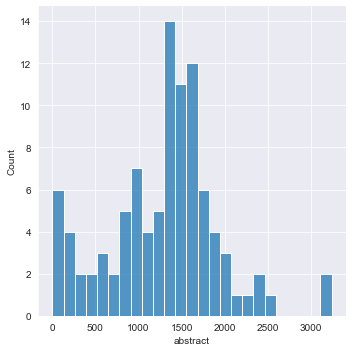

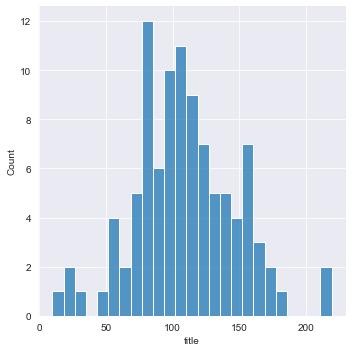

In [174]:
sns.displot(df.abstract.str.len(), bins=25)
sns.displot(df.title.str.len(), bins=25)

In [175]:
df["text"] = df["title"] + " " + df["abstract"]

In [176]:
df[["title", "abstract", "text"]]

,title,abstract,text
0,Protective effects of anti-HMGB1 monoclonal an...,"During ischemia reperfusion (IR) injury, high ...",Protective effects of anti-HMGB1 monoclonal an...
1,Current pharmacological approaches and potenti...,Celiac Disease (CeD) is estimated to currently...,Current pharmacological approaches and potenti...
2,Detailed analysis of anti-emicizumab antibody ...,Emicizumab is a humanized bispecific monoclona...,Detailed analysis of anti-emicizumab antibody ...
3,Neuroprotective Effects of Anti-high Mobility ...,High mobility group box-1 (HMGB1) is a ubiquit...,Neuroprotective Effects of Anti-high Mobility ...
4,Potential and pitfalls of,The relation between tumor uptake and target c...,Potential and pitfalls of The relation betwee...
...,...,...,...
95,Development of a homogeneous time-resolved FRE...,Shiga toxin-producing,Development of a homogeneous time-resolved FRE...
96,Ankylosing Spondylitis.,The seronegative spondyloarthropathies are a g...,Ankylosing Spondylitis. The seronegative spond...
97,Effects of Tocilizumab Therapy on Circulating ...,"Tocilizumab, a humanized anti-IL-6 receptor mo...",Effects of Tocilizumab Therapy on Circulating ...
98,Assessment of the Effect of Erenumab on Effica...,Erenumab is the first human monoclonal antibod...,Assessment of the Effect of Erenumab on Effica...


In [177]:
print(df.title.str.len().mean())
print(df.abstract.str.len().mean())
print(df.text.str.len().mean())


108.62
1277.2886597938145
1388.1237113402062


In [178]:
df.text.str.split(expand=True).stack().value_counts()

of                   786
the                  712
and                  643
in                   447
to                   328
                    ... 
54.8%                  1
determinant,           1
limitation             1
ultrasound-guided      1
repurposing            1
Length: 5756, dtype: int64

In [179]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import re

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
def cleaner(text):
    if type(text) == str:
        text = text.lower()
        text = re.sub("[^a-zA-Z]+", ' ', text)
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
        filtered_sentence = (" ").join(tokens_without_sw)
        return filtered_sentence

In [181]:
cleaner("Biotech in 2021 is a wonderful field to work and study in!")

'biotech wonderful field work study'

In [182]:
df["clean_text"] = df["text"].apply(lambda x: cleaner(x))

In [183]:
df[["text", "clean_text"]].head()

,text,clean_text
0,Protective effects of anti-HMGB1 monoclonal an...,protective effects anti hmgb monoclonal antibo...
1,Current pharmacological approaches and potenti...,current pharmacological approaches potential f...
2,Detailed analysis of anti-emicizumab antibody ...,detailed analysis anti emicizumab antibody dec...
3,Neuroprotective Effects of Anti-high Mobility ...,neuroprotective effects anti high mobility gro...
4,Potential and pitfalls of The relation betwee...,potential pitfalls relation tumor uptake targe...


In [184]:
df.clean_text.str.split(expand=True).stack().value_counts()

patients         160
treatment         97
monoclonal        96
antibody          85
antibodies        83
                ... 
dimeric            1
beagle             1
endopeptidase      1
plasmablasts       1
pathways           1
Length: 3305, dtype: int64

In [201]:
df2 = df[["clean_text"]].dropna()
# df2 = df[df["clean_text"].str.len() > 100]

df2.shape

(97, 1)

In [202]:
df["clean_text"].head()

0    protective effects anti hmgb monoclonal antibo...
1    current pharmacological approaches potential f...
2    detailed analysis anti emicizumab antibody dec...
3    neuroprotective effects anti high mobility gro...
4    potential pitfalls relation tumor uptake targe...
Name: clean_text, dtype: object

In [216]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,10))

wordcloud = WordCloud(width = 5000, 
                      height = 3000, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Blues', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(df2['clean_text']))


<Figure size 1440x720 with 0 Axes>

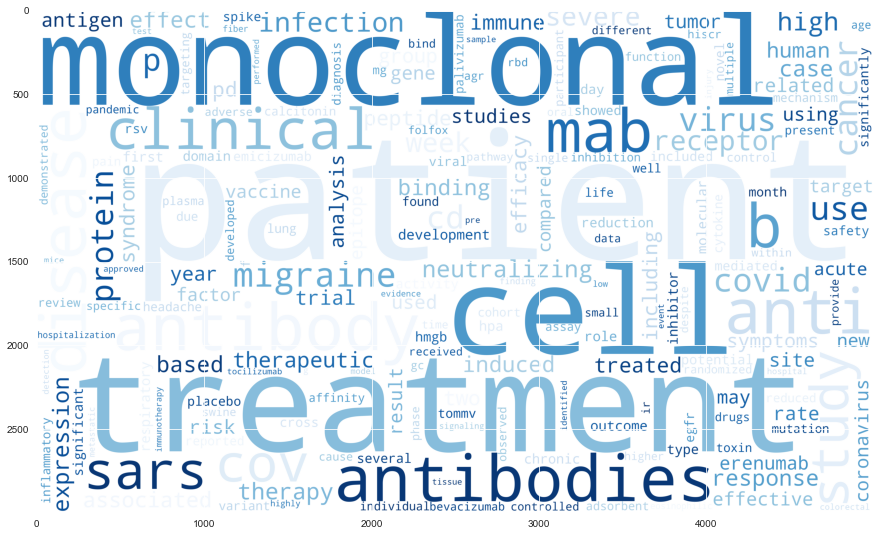

In [217]:
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)